In [1]:
import os

try:
    snakemake
except NameError:
    from snakemk_util import load_rule_args
    
    os.chdir('../..')
    
    snakemake = load_rule_args(
        snakefile = os.getcwd() + "/workflow/Snakefile",
        rule_name = 'tss_cage_pr_curve',
        root = '..',
        default_wildcards={'sample': 'imr90'}
    ) # 

In [2]:
import pyranges as pr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
sample = snakemake.wildcards['sample'].lower().replace(' ', '_')

In [4]:
df_tss = list()

for i in Path(snakemake.input['tss_dir']).iterdir():
    if str(i).endswith('_tss.bed') and str(i.stem).startswith(sample):
        df_tss.append(pr.read_bed(str(i)).df)
               
gr_tss = pr.PyRanges(
    pd.concat(df_tss)
    .astype({'Chromosome': 'str', 'Strand': 'str'})
    .groupby(['Chromosome', 'Start', 'End', 'Strand'])
    .agg('sum')
    .reset_index(),
    int64=True
)

In [5]:
len(df_tss)

1

In [6]:
df_tss = [
    _df.set_index(['Chromosome', 'Start', 'End', 'Strand'])[['Score']]
       .rename(columns={'Score': f'Score_{i}'})
    for i, _df in enumerate(df_tss)
]

In [7]:
df_counts = df_tss[0]

for i, _df in enumerate(df_tss[1:]):
    df_counts = df_counts.join(_df, how='outer')

cols = df_counts.columns
df_counts = df_counts.reset_index()

In [8]:
df_counts = df_counts[df_counts['Chromosome'].str.startswith('chr')].fillna(0)
df_counts = df_counts[cols]

TypeError: Cannot setitem on a Categorical with a new category (0), set the categories first

In [ ]:
df_counts = df_counts.loc[df_counts.sum(axis=1).sort_values(ascending=False).index]

In [ ]:
reps = ((df_counts > 0).sum(1) / len(cols)).rolling(window=1000).mean()

In [ ]:
plt.figure(figsize=(5, 5), dpi=300)
plt.plot(range(len(reps)), reps.tolist())
plt.xlim((0, 20000))

In [23]:
reps[reps > 0.70]

39038    0.974667
7620     0.974667
567      0.974667
14234    0.974667
54602    0.974667
           ...   
22949    0.701000
87761    0.701000
60634    0.700667
16297    0.700667
24530    0.700333
Length: 10466, dtype: float64

In [13]:
snakemake.input['bed']

['/data/homezvol2/mcelik/Projects/rnawg/data/resources/cage/idr_peak/ENCFF038OTF.bed']

In [9]:
df_true = pd.concat([
    pd.read_csv(i, sep='\t', header=None)
    .rename(columns={0: 'Chromosome', 1: 'Start', 2: 'End', 5: 'Strand'})
    for i in snakemake.input['bed']
])
df_true = df_true[(df_true[4] > 540)] # IDR < 0.05

gr_true = pr.PyRanges(df_true[['Chromosome', 'Start', 'End', 'Strand']], int64=True)

In [10]:
gr_tss = gr_tss[gr_tss.Score > 1]

In [11]:
gr = gr_tss.join(gr_true, strandedness='same', suffix='_true', how='outer', slack=100)

/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scdf = scdf.append(sh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocdf = ocdf.append(oh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scdf = scdf.append(sh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocdf = ocdf.append(oh)
/pub/mcelik/

/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scdf = scdf.append(sh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocdf = ocdf.append(oh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scdf = scdf.append(sh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocdf = ocdf.append(oh)
/pub/mcelik/

/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scdf = scdf.append(sh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocdf = ocdf.append(oh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scdf = scdf.append(sh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocdf = ocdf.append(oh)
/pub/mcelik/

/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scdf = scdf.append(sh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocdf = ocdf.append(oh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scdf = scdf.append(sh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocdf = ocdf.append(oh)
/pub/mcelik/

/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scdf = scdf.append(sh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocdf = ocdf.append(oh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scdf = scdf.append(sh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocdf = ocdf.append(oh)
/pub/mcelik/

/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocdf = ocdf.append(oh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scdf = scdf.append(sh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocdf = ocdf.append(oh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scdf = scdf.append(sh)
/pub/mcelik/

/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scdf = scdf.append(sh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocdf = ocdf.append(oh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scdf = scdf.append(sh)
/pub/mcelik/anaconda/envs/rnawg/lib/python3.8/site-packages/pyranges/methods/join.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocdf = ocdf.append(oh)
/pub/mcelik/

In [12]:
gr = gr[gr.Chromosome.str.startswith('chr')]

In [13]:
gr = gr.df[(gr.df['Score'] != -1) | (gr.df['Start_true'] != -1)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


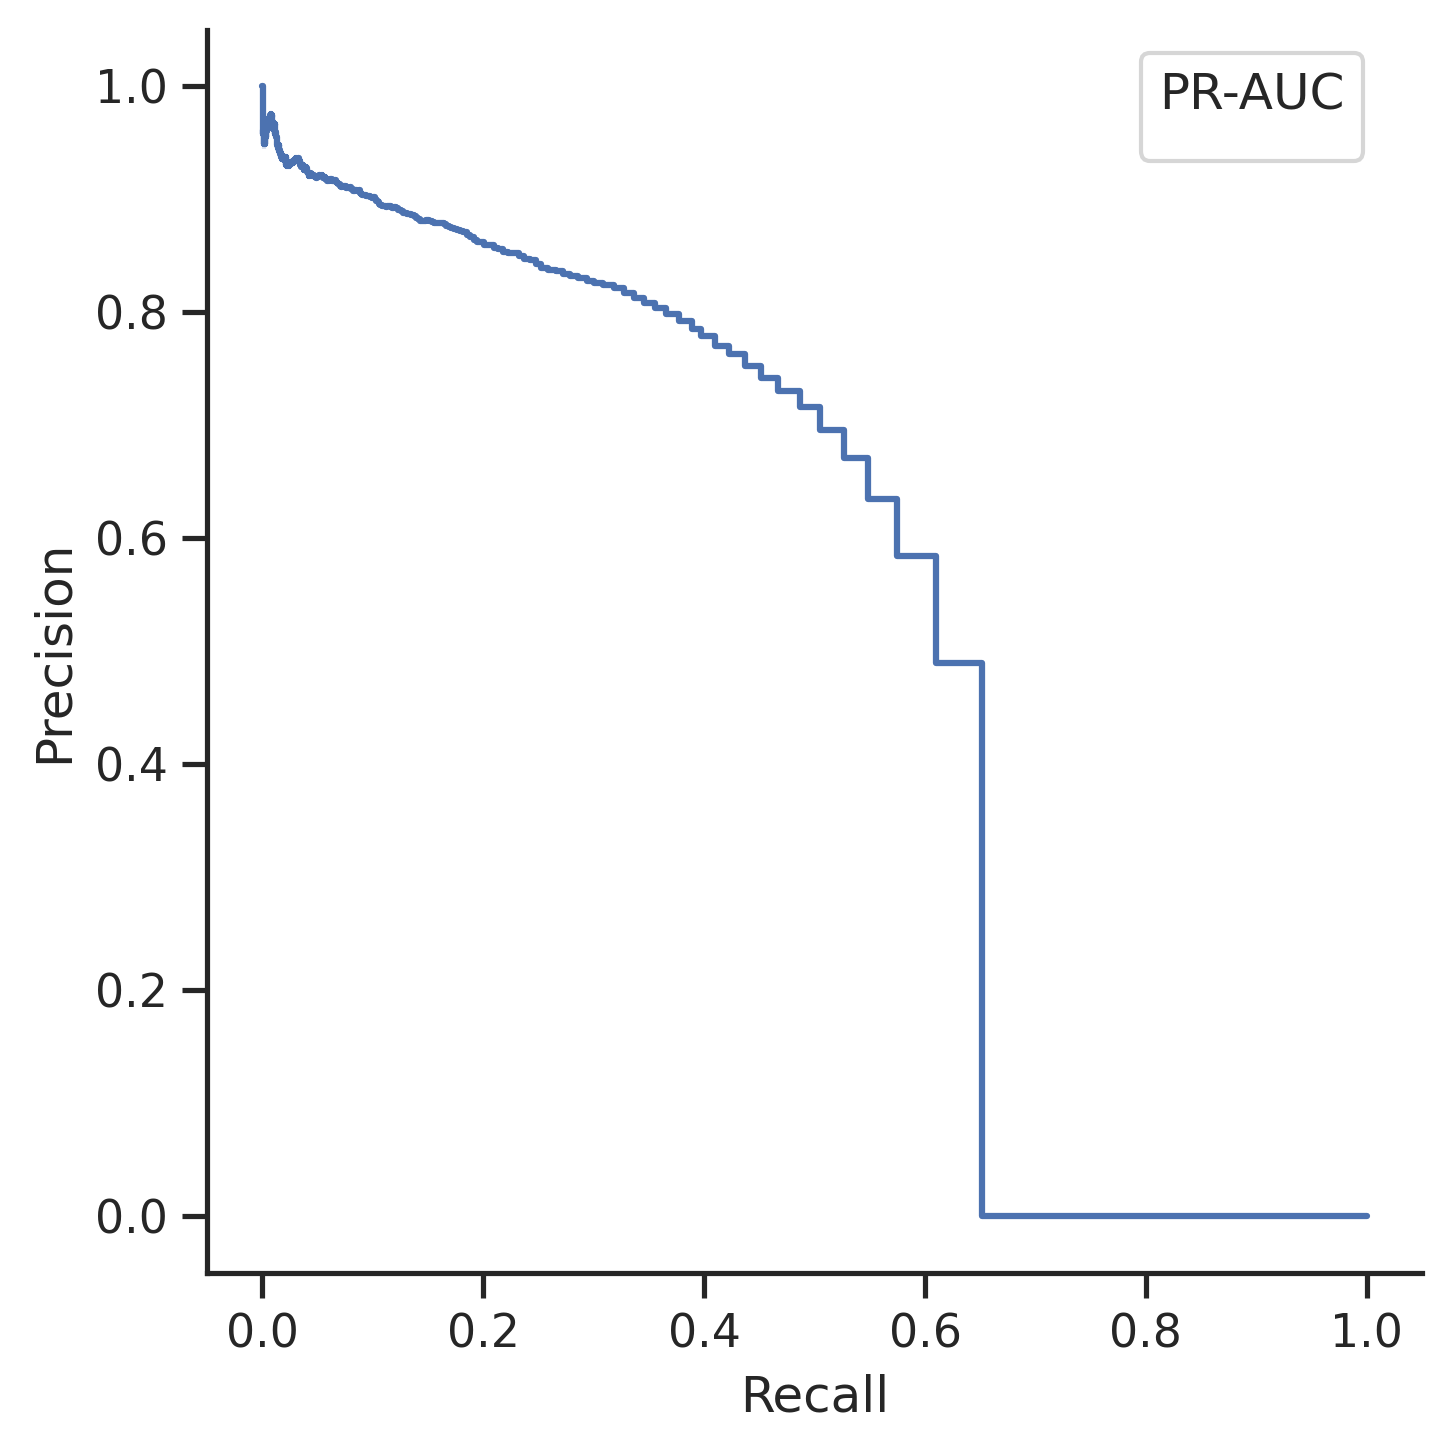

In [14]:
plt.figure(figsize=(5, 5), dpi=300)

from sklearn.metrics import average_precision_score, precision_recall_curve, roc_curve

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

ground_truth = list((gr.Start_true != -1).astype(int))
score = list(gr.Score.replace(-1, 0))

prec, recall, threshold = precision_recall_curve(
    ground_truth, score, pos_label=1)
prec[0] = 0

df_benchmark = pd.DataFrame({
    'Precision': prec,
    'Recall': recall,
    'threshold': [0] + threshold.tolist()
})

sns.lineplot(data=df_benchmark, y='Precision', x='Recall', drawstyle='steps-pre')

plt.legend()._legend_box.align='right'

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.legend(f'{int(average_precision_score(ground_truth, score) * 100)}%')
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.75, 1.), loc='upper left', title='PR-AUC')

In [20]:
df_benchmark.to_csv(snakemake.output['pr'], index=False)

In [16]:
df_benchmark[df_benchmark['threshold'] > 10]

,Precision,Recall,threshold
11,0.770205,0.422339,11
12,0.779409,0.409562,12
13,0.785183,0.396900,13
14,0.792084,0.388535,14
15,0.798358,0.376755,15
...,...,...,...
522,1.000000,0.000422,4401
523,1.000000,0.000345,6179
524,1.000000,0.000230,7128
525,1.000000,0.000115,7248


In [17]:
gr_tss[gr_tss.Score > 10]

,Chromosome,Start,End,Strand,Name,Score
0,ERCC-00002,0,1,+,1,1589
1,ERCC-00003,0,1,+,1,42
2,ERCC-00004,0,1,+,1,238
3,ERCC-00009,983,984,-,984,60
4,ERCC-00042,0,1,+,1,20
...,...,...,...,...,...,...
8430,chrX,154886159,154886331,-,154886257,13
8431,chrX,155027029,155027055,-,155027055,12
8432,chrX,155070973,155070994,-,155070977,11
8433,chrX,155071099,155071333,-,155071166,11
